# Customer Segmentation for Adobe: Challenges and Solutions  

## Dataset Overview  
The dataset, named `feature_extracting_cleaned`, contains **32 columns** comprising categorical, numerical, and boolean features. Key features include:  

- **Behavioral Metrics:** e.g., `ps_weekday_working_usage`, `ps_weekend_usage`, `total_video_usage`, `camera_usage_ratio`.  
- **Performance Scores:** e.g., `digital_design_score`, `design_complexity_score`, `video_media_creation_score`.  
- **Customer Attributes:** e.g., `sub_type`, `market_segment`, `most_used_products`.  
- **System Specs:** e.g., `memory_category`, `machine_ps_speed_bin`.  

The `ps_cluster` column represents pre-defined customer segments but has proven inadequate for accurate classification.  

---

## The Problem  
1. **Poor Classification Performance:**  
   Attempts to classify customers using the `ps_cluster` feature as the target variable have yielded unsatisfactory results. This suggests the clusters may not align well with customer behavior.  

2. **Complex Data Composition:**  
   The dataset includes a mix of feature types, with some variables (e.g., `ps_doc_average_openseconds`) requiring careful preprocessing to ensure validity.  

3. **Lack of Meaningful Segmentation:**  
   The pre-defined clusters fail to capture nuanced user behavior, limiting the ability to extract actionable marketing insights.  

---

## Proposed Solution  

### 1. Feature Engineering and Data Cleaning  
   - **Invalid Data Removal:** Features like `ps_doc_average_openseconds` are cleaned to exclude zero or negative values.  
   - **Purpose Inference:** Activity-based usage metrics, such as `ps_weekday_working_usage`, are used to infer whether the user’s purpose is work-related or personal.  
   - **Skill Level Estimation:** Time spent on tools is used as a proxy for user expertise.  

### 2. Custom Clustering Approach  
   - Replace `ps_cluster` with new, data-driven clusters.  
   - Algorithms under consideration include:  
     - **K-Means:** For compact, well-defined clusters.  
     - **DBSCAN:** To identify clusters with varying densities.  
     - **Hierarchical Clustering:** For detecting natural groupings.  
   - Evaluate clusters using metrics such as Silhouette Score and Elbow Method to ensure they are robust and interpretable.  

### 3. Classification Validation  
   - The new clusters will serve as the target variable for classification models.  
   - Expected Outcome: Improved model performance and better alignment with customer behavior.  

---

## Objective  
To create meaningful customer segments that empower Adobe’s marketing team with actionable insights, enabling:  

1. **Precise Campaign Targeting:**  
   Align marketing efforts with specific user behaviors and preferences.  

2. **Personalized Recommendations:**  
   Tailor campaigns for distinct customer groups based on usage patterns and skill levels.  

3. **Improved Retention and Engagement:**  
   Enhance user satisfaction by addressing specific needs identified in the clusters.  

By rethinking segmentation, this project aims to bridge the gap between data analysis and effective marketing strategies.


In [22]:
import pandas as pd 
feature_extracting_cleaned = pd.read_csv('C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/feature_extract.csv')
feature_extracting_cleaned.drop(columns= 'Unnamed: 0', inplace=True)
feature_extracting_cleaned.head(3)

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,ps_doc_average_file_size,ps_doc_average_openseconds,generic_email,count_camera_make,...,visual_media_score,traditional_art_score,commercial_design_score,design_complexity_score,social_media_score,total_visual_usage,total_design_illustration_usage,total_adobe_activity_score,video_media_creation_score,design_engagement_score
0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,Small,Long,True,0.005525,...,0.016575,0.005525,0.0,0.001842,0.016575,0.276243,0.027624,0.042357,0.0,0.0
1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,Medium,Long,True,0.005525,...,0.000000,0.000000,0.0,0.000000,0.000000,0.151934,0.151934,0.012891,0.0,0.0
2,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.566488,0.244484,0.189028,Small,Short,True,0.011050,...,0.000000,0.000000,0.0,0.000000,0.000000,0.831492,0.279006,0.029466,0.0,0.0


In [23]:
feature_extracting_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       10276 non-null  object 
 1   market_segment                   10276 non-null  object 
 2   sub_type                         10276 non-null  object 
 3   ps_weekday_working_usage         10276 non-null  float64
 4   ps_weekday_nonworking_usage      10276 non-null  float64
 5   ps_weekend_usage                 10276 non-null  float64
 6   ps_doc_average_file_size         10276 non-null  object 
 7   ps_doc_average_openseconds       10276 non-null  object 
 8   generic_email                    10276 non-null  bool   
 9   count_camera_make                10276 non-null  float64
 10  count_camera_model               10276 non-null  float64
 11  total_video_usage                10276 non-null  float64
 12  total_3d_usage    

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [38]:
data = feature_extracting_cleaned.copy()

In [179]:
# Define numeric and categorical columns
numeric_columns = [
    'ps_weekday_working_usage', 
    'ps_weekday_nonworking_usage', 
    'ps_weekend_usage', 
    'count_camera_make', 
    'count_camera_model', 
    'total_video_usage', 
    'total_3d_usage', 
    'num_used_products', 
    'camera_usage_ratio', 
    'digital_design_score', 
    'visual_media_score', 
    'traditional_art_score', 
    'commercial_design_score', 
    'design_complexity_score', 
    'social_media_score', 
    'total_visual_usage', 
    'total_design_illustration_usage', 
    'total_adobe_activity_score', 
    'video_media_creation_score', 
    'design_engagement_score'
]

# categorical_columns = [
#     'ps_doc_average_file_size',
#     'ps_doc_average_openseconds',
#     'machine_ps_max_numprocessors', 
#     'memory_category', 
#     'operating_system', 
#     'most_used_products',
#     'sub_type'
# ]

In [180]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Scale numeric data
scaler = StandardScaler()
scaled_numeric_data = pd.DataFrame(
    scaler.fit_transform(feature_extracting_cleaned[numeric_columns]),
    columns=numeric_columns
)

# # Encode categorical data
# label_encoder = LabelEncoder()
# encoded_categorical_data = feature_extracting_cleaned[categorical_columns].apply(label_encoder.fit_transform)


In [181]:
# Combine scaled numeric and encoded categorical data
#clustering_data = pd.concat([scaled_numeric_data, encoded_categorical_data], axis=1)
clustering_data = scaled_numeric_data


In [182]:
def elbow_method(data, max_clusters=10):
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method to Determine Optimal Clusters')
    plt.show()


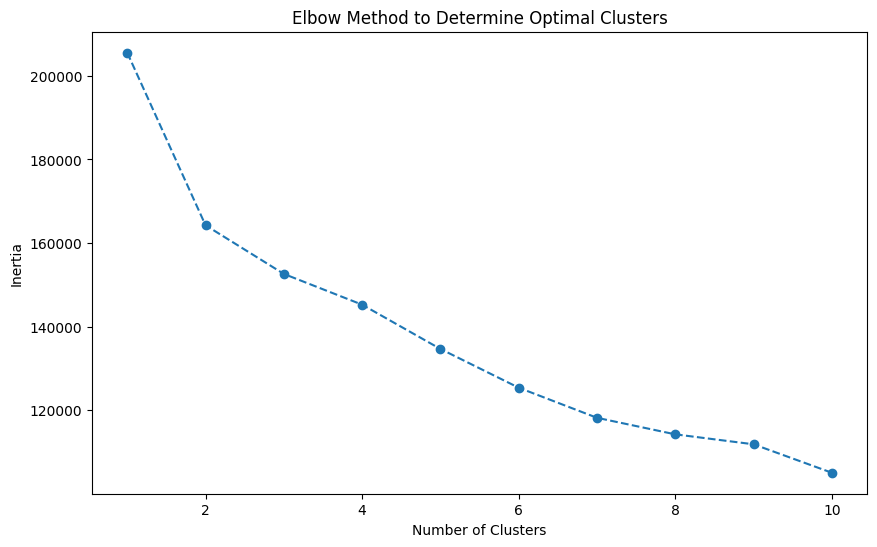

In [183]:
# Perform Elbow Analysis
elbow_method(clustering_data, max_clusters=10)

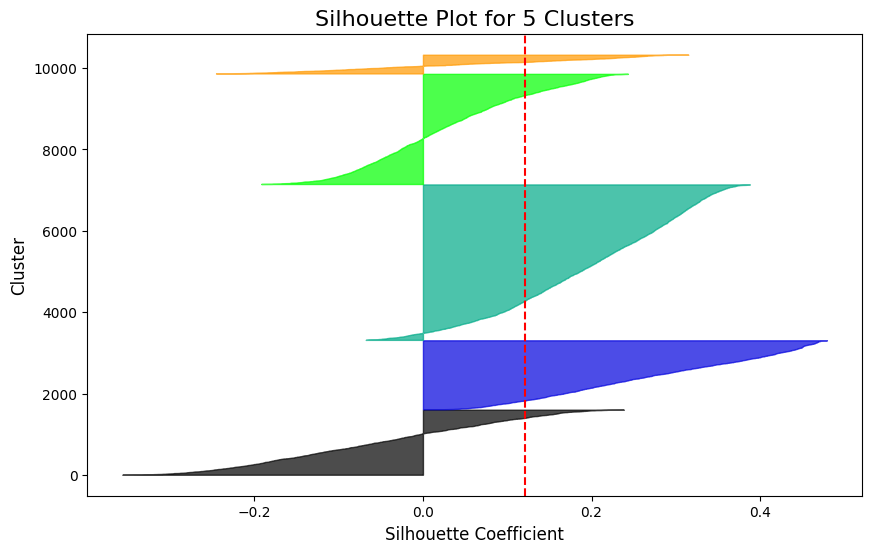

Cluster Analysis for 5 Clusters:

Cluster 0 Profile:
                            Feature      Mean  Standard Deviation
0          ps_weekday_working_usage  0.307385            0.870432
1       ps_weekday_nonworking_usage -0.133335            0.768743
2                  ps_weekend_usage -0.256207            0.741169
3                 count_camera_make  1.299477            1.161924
4                count_camera_model  1.373103            1.606556
5                 total_video_usage  0.632175            1.777559
6                    total_3d_usage  0.151220            1.364271
7                 num_used_products  0.344662            0.934259
8                camera_usage_ratio  1.252807            1.061902
9              digital_design_score  1.409330            1.736883
10               visual_media_score  1.451336            1.670056
11            traditional_art_score  1.177824            1.896235
12          commercial_design_score  1.272113            1.903956
13          design_comp

In [178]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to calculate silhouette scores and visualize them
def silhouette_analysis(data, n_clusters_list):
    results = {}
    
    for n_clusters in n_clusters_list:
        # Perform KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(data)

        # Silhouette scores
        silhouette_avg = silhouette_score(data, labels)
        silhouette_vals = silhouette_samples(data, labels)
        results[n_clusters] = {'silhouette_avg': silhouette_avg, 'labels': labels, 'silhouette_vals': silhouette_vals}

        # Silhouette Plot
        fig, ax = plt.subplots(figsize=(10, 6))
        y_lower = 10
        for i in range(n_clusters):
            cluster_silhouette_vals = silhouette_vals[labels == i]
            cluster_silhouette_vals.sort()
            size_cluster_i = cluster_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i
            color = plt.cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                cluster_silhouette_vals,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            y_lower = y_upper + 10
        ax.set_title(f"Silhouette Plot for {n_clusters} Clusters", fontsize=16)
        ax.set_xlabel("Silhouette Coefficient", fontsize=12)
        ax.set_ylabel("Cluster", fontsize=12)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.show()
    
    return results

# Function to analyze cluster features
def cluster_analysis(data, labels, n_clusters):
    analysis = []
    clustering_data['cluster'] = labels
    for cluster in range(n_clusters):
        cluster_data = clustering_data[clustering_data['cluster'] == cluster]
        cluster_means = cluster_data.mean()
        cluster_stds = cluster_data.std()
        analysis.append(
            pd.DataFrame(
                {
                    "Feature": cluster_means.index,
                    "Mean": cluster_means.values,
                    "Standard Deviation": cluster_stds.values,
                }
            )
        )
    clustering_data.drop(columns=['cluster'], inplace=True)  # Clean up added column
    return analysis

# Perform silhouette analysis and cluster profiling for 4, 5, 6 clusters
n_clusters_list = [5]
silhouette_results = silhouette_analysis(clustering_data, n_clusters_list)

for n_clusters in n_clusters_list:
    print(f"Cluster Analysis for {n_clusters} Clusters:")
    cluster_profiles = cluster_analysis(clustering_data, silhouette_results[n_clusters]['labels'], n_clusters)
    for i, profile in enumerate(cluster_profiles):
        print(f"\nCluster {i} Profile:")
        print(profile)
